# 1.문제 정의


- E-Commerce의 핵심  

    => 고객의 신뢰


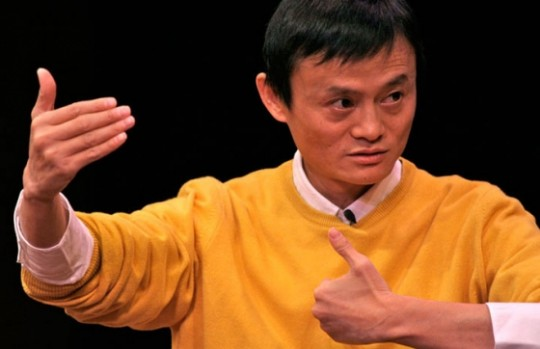

- 고객의 신뢰

    1. 주문한 상품의 품질
    2. 결제, 환불 시스템
    3. 정시, 안전 배송

⭐ **정시배송 예측모델** ⭐

# 2.데이터 선정

In [1]:
#@title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/코드스테이츠/Project/Project_section2/E-Commerce Shippng Data.csv")

df['Late'] = 0
df["Late"][df["Reached.on.Time_Y.N"]==1]=0
df["Late"][df["Reached.on.Time_Y.N"]==0]=1
df.drop(columns="Reached.on.Time_Y.N",inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [3]:
#@title
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,1
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,1


In [4]:
#@title
columns = pd.DataFrame(df.columns.tolist())
columns.index = (range(1,13))
columns.columns=["Columns"]
columns

,Columns
1,ID
2,Warehouse_block
3,Mode_of_Shipment
4,Customer_care_calls
5,Customer_rating
6,Cost_of_the_Product
7,Prior_purchases
8,Product_importance
9,Gender
10,Discount_offered


- ID : 고객의 아이디 Number
- Warehouse_block : 물류창고 구역 구분
- Mode_of_Shipment : 배송 교통수단
- Customer_care_calls : 배송조회 문의전화 건수
- Customer_rating : 우수고객평가(회사입장)
- Cost_of_the_Product : 상품의 가격
- Prior_purchases : 이전 구매 횟수
- Product_importance : 제품의 매출 중요도(회사입장)
- Gender : 고객의 성별
- Discount_offered : 상품에 적용된 할인비율
- Weight_in_gms : 제품의 무게  

- 🔥 **Late** : 배송 지연 여부


# 3.가설, 평가지표, 기준모델




## ▶ 가설

1. 교통수단에 따라

2. Warebhouse block에 따라(상품의 카테고리별)

3. 제품의 무게에 따라

4. 배송문의 횟수에 따라



## ▶ 평가지표


- 민감도
  
   => 제대로 배송지연으로 예측한 건수/실제 배송지연 건수

   ex) 민감도 0.7 => 배송지연 10건 중 7건 예측가능


- 정확도

    기준모델 => 0.596


# 4.EDA & 데이터 전처리

## ▶ 전처리

In [5]:
#@title
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 상품원가(할인제외)
df["Original_Cost"] = round(df['Cost_of_the_Product']/(1-df['Discount_offered']*0.01)).astype(int)

# Flight, Ship / Road 구분
df["Long_distance"] = 0
df["Long_distance"][df['Mode_of_Shipment'].isin(["Flight", "Ship"])] = 1

# Special Discount(상품 대부분이 10% 내, 10% 이상은 특별할인으로 구분)
df["Special_discount"] = 0
df["Special_discount"][df["Discount_offered"]>10] = 1

#@title
from sklearn.model_selection import train_test_split
features = df.columns.drop("Late")
target = "Late"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state=10,stratify=df["Late"])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [6]:
#@title
df.loc[:,["Original_Cost", "Long_distance", "Special_discount"]]

,Original_Cost,Long_distance,Special_discount
0,316,1,1
1,527,1,1
2,352,1,1
3,196,1,0
4,341,1,1
...,...,...,...
10994,255,1,0
10995,247,1,0
10996,252,1,0
10997,228,1,0


- Original_Cost : 상품의 정가

- Long_distance : 선박,항공편/ 차량편 구분

- Special_discount : 10%이하 할인 상품 / 10% 이상 할인 상품

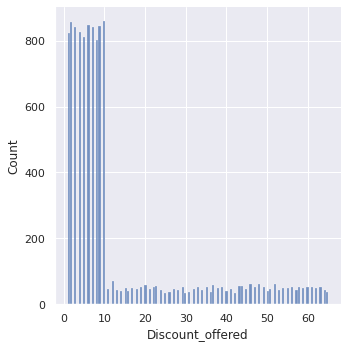

In [26]:
#@title
a = sns.displot(df["Discount_offered"])

## ▶  EDA

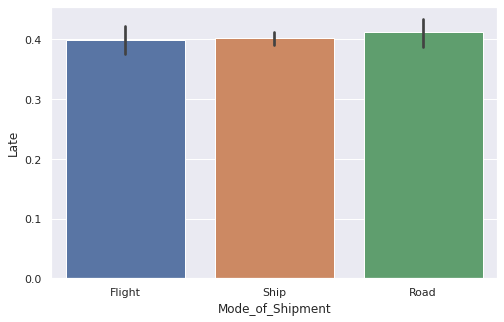

In [8]:
#@title
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize': (8,5)})
a = sns.barplot(x='Mode_of_Shipment', y="Late",data=df)


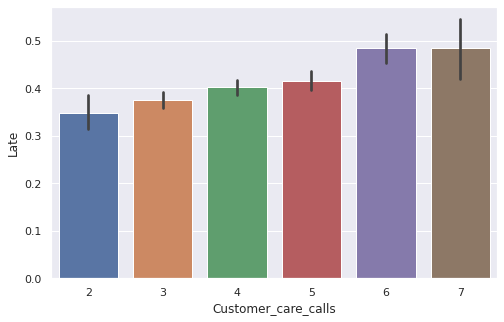

In [9]:
#@title
sns.set(rc={'figure.figsize': (8,5)})
sns.barplot(x='Customer_care_calls', y="Late",data=df)

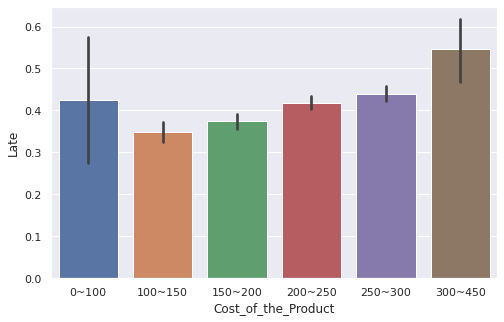

In [10]:
#@title
df2 = df.copy()
df2["Cost_of_the_Product"] = pd.cut(df["Cost_of_the_Product"], bins=[int(0),int(100),int(150),int(200),int(250),int(300),int(350)], include_lowest=True, labels=["0~100", "100~150", "150~200","200~250", "250~300", "300~450"])
sns.set(rc={'figure.figsize': (8,5)})
sns.barplot(x="Cost_of_the_Product", y="Late", data=df2)


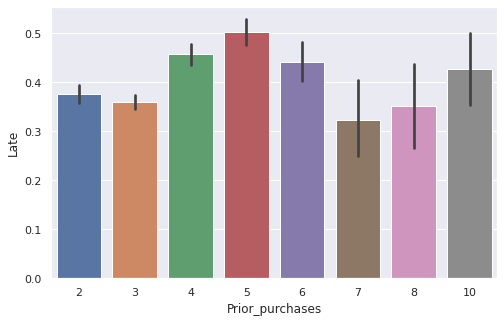

In [11]:
#@title
sns.set(rc={'figure.figsize': (8,5)})
sns.barplot(x='Prior_purchases', y="Late", data=df)

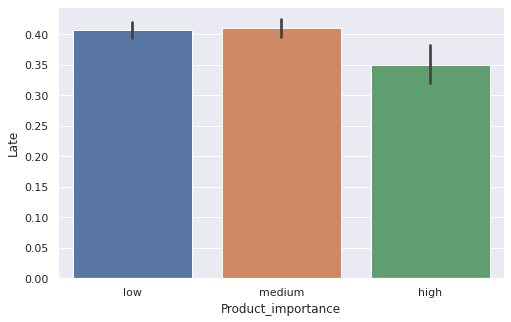

In [12]:
#@title
sns.set(rc={'figure.figsize': (8,5)})
sns.barplot(x="Product_importance", y="Late", data=df)

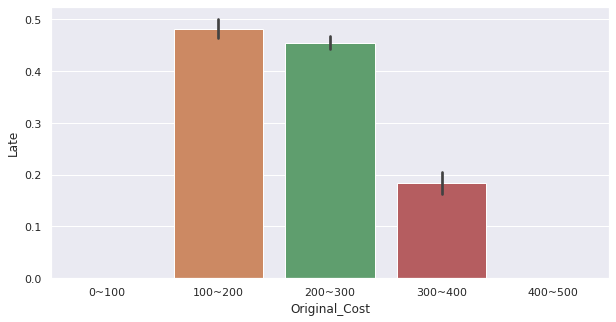

In [13]:
#@title
df2["Original_Cost"] = pd.cut(df["Original_Cost"], bins=[0,100,200,300,400,500], include_lowest=True, labels=["0~100", "100~200", "200~300", "300~400", "400~500"])
sns.set(rc={'figure.figsize': (10,5)})
sns.barplot(x="Original_Cost", y="Late", data=df2)

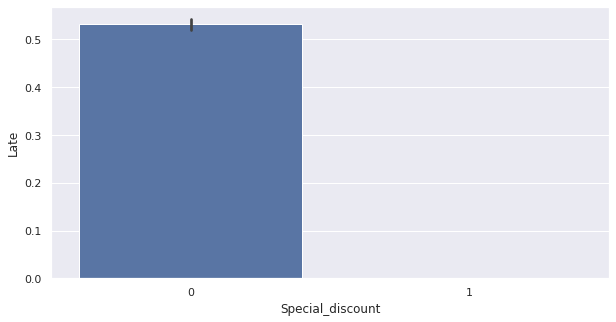

In [14]:
#@title
sns.barplot(x='Special_discount', y='Late', data=df)

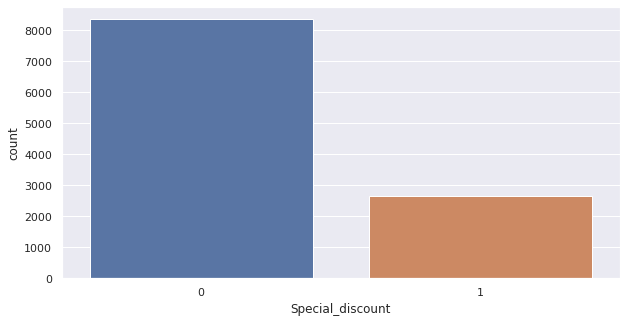

In [15]:
#@title
sns.countplot(x="Special_discount", data=df)

# 5.모델링 및 검증

전처리 : TargetEncoder

모델링: RandomForestClassification

최적화: Kselection, RandomizedSearchCV

In [16]:
#@title
!pip install category_encoders

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import numpy as np
from category_encoders import TargetEncoder
from scipy.stats import uniform

pipe = make_pipeline(TargetEncoder(), SimpleImputer(), RandomForestClassifier())
dists = {
         'randomforestclassifier__max_depth':range(5,10), 'randomforestclassifier__n_estimators':range(100,200,10), 'randomforestclassifier__max_features':uniform(0,1)}
clf = RandomizedSearchCV(pipe, param_distributions=dists, n_iter=50, cv=5, scoring="recall", verbose=1, n_jobs=-1)

clf.fit(X_train, y_train)

predict = clf.predict(X_val)

print("검증 데이터 민감도: ", recall_score(y_val, predict))

     |████████████████████████████████| 80 kB 3.8 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fitting 5 folds for each of 50 candidates, totalling 250 fits
검증 데이터 민감도:  0.977110157367668


In [17]:
#@title
predict2 = clf.predict(X_test).tolist()
y_test = y_test.tolist()
result = pd.DataFrame([predict2, y_test])
result = result.T
result.columns=["Predict", "Late"]
result.head(20)

,Predict,Late
0,1,1
1,0,0
2,0,0
3,1,1
4,1,0
5,1,1
6,0,0
7,0,0
8,1,0
9,1,1


In [18]:
#@title
print("민감도: ", recall_score(y_test, clf.predict(X_test)))
print("\n")
print("정확도: ",accuracy_score(y_test,clf.predict(X_test)))

print("(기준모델: 0.596)")

민감도:  0.9819616685456595


정확도:  0.6872727272727273
(기준모델: 0.596)


# 6.모델 해석

In [19]:
#@title
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline

pipe2 = Pipeline([("preprocessing",make_pipeline(OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), SimpleImputer())),
                  ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1))])
pipe2.fit(X_train, y_train)

permuter = PermutationImportance(pipe2.named_steps['rf'], scoring = 'recall', n_iter=5, random_state=2)
X_val_transformed = pipe2.named_steps['preprocessing'].transform(X_val)
permuter.fit(X_val_transformed, y_val);

     |████████████████████████████████| 216 kB 5.5 MB/s 
     |████████████████████████████████| 133 kB 31.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=77359b95d46d3cdb682785a4c21624d295f33de72eb9874f4b68c03a2233f5f9
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [20]:
#@title
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Cost_of_the_Product   -0.010873
Customer_rating       -0.010014
Product_importance    -0.009156
Customer_care_calls   -0.007439
Gender                -0.007153
Warehouse_block       -0.006009
Mode_of_Shipment      -0.004864
Prior_purchases       -0.004578
ID                     0.000000
Long_distance          0.001144
Original_Cost          0.029757
Weight_in_gms          0.078684
Discount_offered       0.096137
Special_discount       0.167096
dtype: float64

# 7.문제 해결



1.   **배송 최적화(자체 배송)**


2.   **배송지연 예측 주문 우선처리**


3.   **배송지연 안내문**


4.   **사은품(재구매율 高)**



